#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL.
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


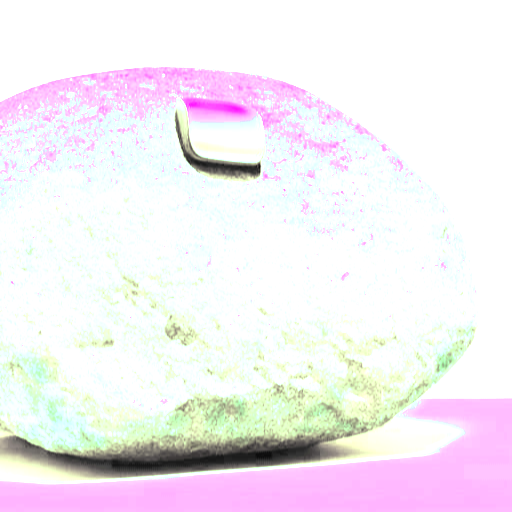

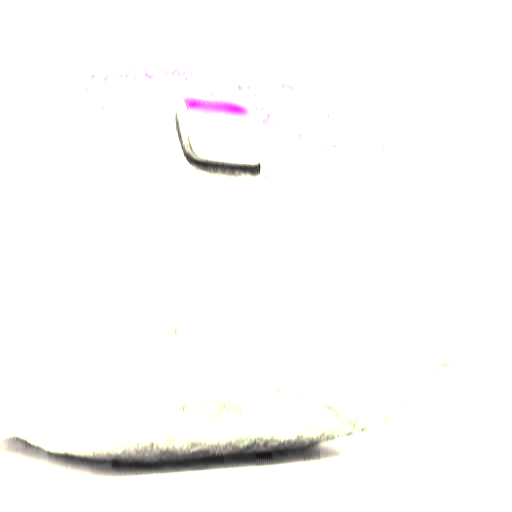

In [3]:
from skimage import io
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

yourUrl = 'https://res.cloudinary.com/dxmxnbhzq/image/upload/v1694970720/rockimgs/g3v6nmu5tiz2jvlz41he.jpg'
image = io.imread(yourUrl)

# convert to BGR if you are using openCV
image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR_FULL)

#prepare the 3x3 shaped filter
k1 = np.array([[1],[2],[1]])

#prepare the 5x5 shaped filter
k2 = np.array([[1],[1],[2],[1],[1]])

# Normalize the kernels if needed. 3x3 filter has 1/9 factor, 5x5 has a 1/25 factor
k1 * 1/9
k2 * 1/25

# apply filter
final_frame = cv2.filter2D(image, -1, k1)
final_frame2 = cv2.filter2D(image, -1, k2)

#make sure you are the right data type and values. You can use histogram to check it
# 0-255 if uint8
# 0-1 if float

# visualize
cv2_imshow(final_frame)
cv2_imshow(final_frame2)
# The 5x5 filter produce more accurate feature map since more information will be processed

3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9.





In [5]:
#add your code here

# A possible implementation is here. Modify it play with it:
import numpy as np

def gkern(l=5, sig=1.):
#    creates gaussian kernel with side length l and a sigma of sig
   ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
   xx, yy = np.meshgrid(ax, ax)
   kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
   return kernel / np.sum(kernel)   #note that this normalize the filter to 1. is it desirable?.

gk1 = gkern(3, 1)
gk2 = gkern(5, 1.2)
gk3 = gkern(9, 1.6)

4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ?

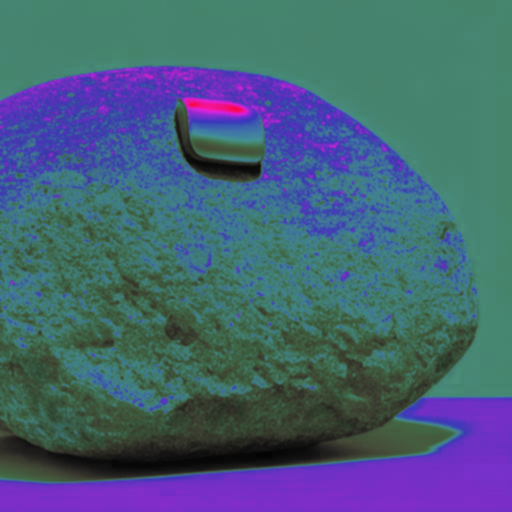

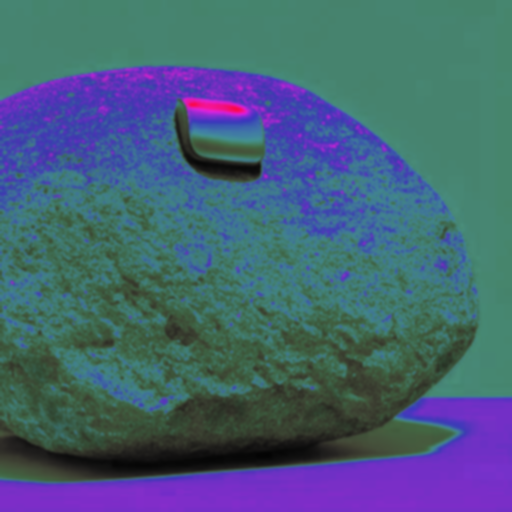

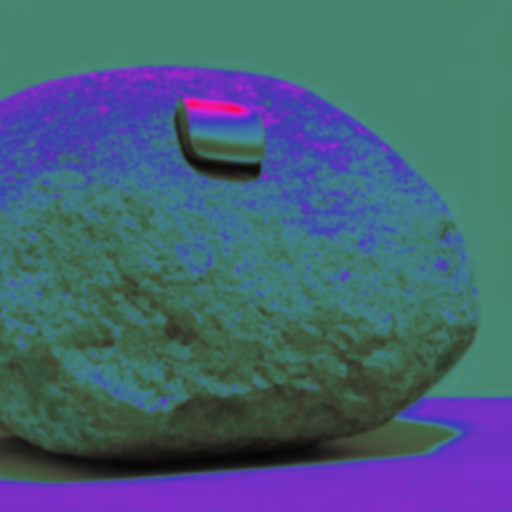

In [6]:
frame1 = cv2.filter2D(image, -1, gk1)
frame2 = cv2.filter2D(image, -1, gk2)
frame3 = cv2.filter2D(image, -1, gk3)
cv2_imshow(frame1)
cv2_imshow(frame2)
cv2_imshow(frame3)
# image tend to be fuzzier with larger sigmas.
# Compare to the results of question 2, only changing size of filter would cause loss of features.
# But adjust sigma while changing size of the filter seems kept more feature of the original image.
# So I'll say change size of filters while adjusting the sigma would be the most effective.

Add your comments here


5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



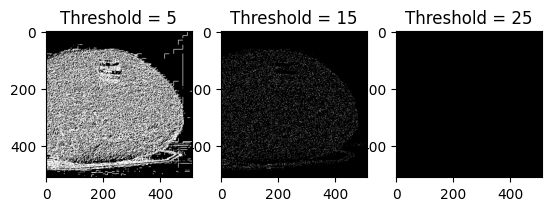

In [7]:
import matplotlib.pyplot as plt
# step 1. Get x and y gradients . Use the correct kernels
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
gradx = cv2.filter2D(gray,-1,sobelx)
grady = cv2.filter2D(gray,-1,sobely)

# step 2. Compute the magnitude of the gradient
magnitude = np.sqrt(gradx**2 + grady**2)
# Step 3. Threshold. Choose 3 different threshold. visualize outputs
thresholds = [5,15,25]
for i, threshold in enumerate(thresholds):
    binary_image = np.zeros_like(magnitude)
    binary_image[magnitude >= threshold] = 255

    plt.subplot(1, len(thresholds), i + 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Threshold = {threshold}')

plt.show()

# discuss: As the threshold getting larger, the edge of the image is less visible

Edit your comments here


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


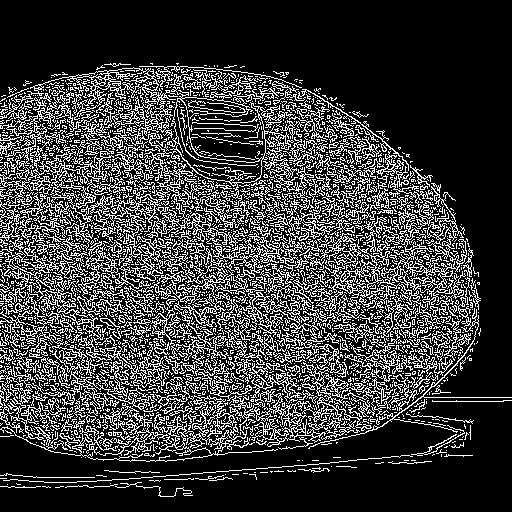

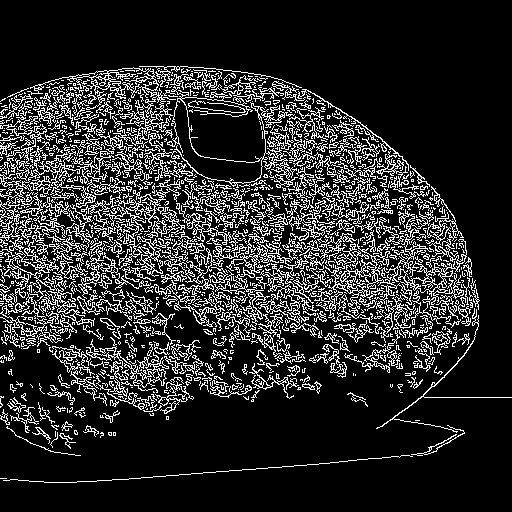

In [8]:
# use the canny from openCV
threshold1_set1 = 20
threshold2_set1 = 60

threshold1_set2 = 100
threshold2_set2 = 250
set1 = cv2.Canny(image, threshold1_set1,	threshold2_set1)
set2 = cv2.Canny(image, threshold1_set2,	threshold2_set2)
cv2_imshow(set1)
cv2_imshow(set2)
# Compare these 2 set, lower threshold value will detect more edges
# while higher threshold value will lead to fewer

Edit your comments here

Now, you are going to use morphological operations to try to count automatically the number of rice grains from an image.

7. Read image, convert it to gray scale and apply a bilateral filter.
<br>A bilateral filter is a filter that smooth where there is not changes on the gray scale preserving values close to edges. To understand bilateral filters  [Click here](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)


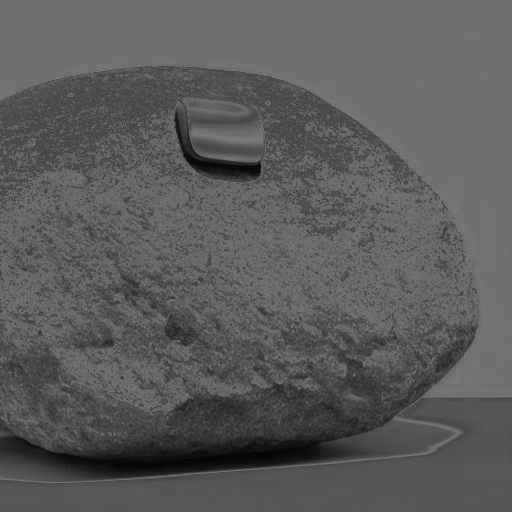

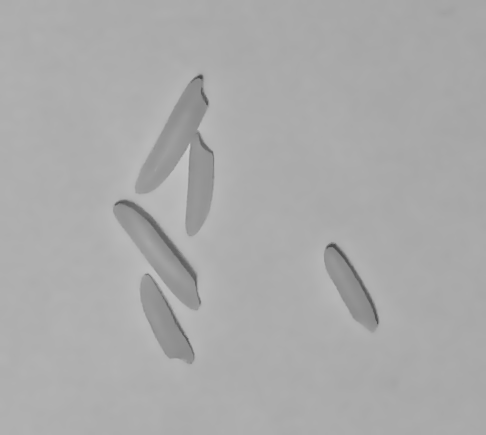

In [11]:
from skimage import io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests
from PIL import Image
from io import BytesIO

url = 'https://i.stack.imgur.com/pgWt1.jpg'
response = requests.get(url)
img_pil = Image.open(BytesIO(response.content))

# Convert to NumPy array for OpenCV use
image = np.array(img_pil)
img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# utilize cvtColor to convert to gray
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the gray scale image
cv2_imshow(gray)

# apply a bilateral filter. Adjust the value to your convenience
diameter_neighborhood= 11
sigma_color_space = 17
sigma_spatial_space = 5
gray2 = cv2.bilateralFilter(gray2, diameter_neighborhood, sigma_color_space, sigma_spatial_space)
cv2_imshow(gray2)




8. Compute the edges of the previous image with a Canny filter. Adjust the thresholds of the canny filter to obtain the best edge you can.

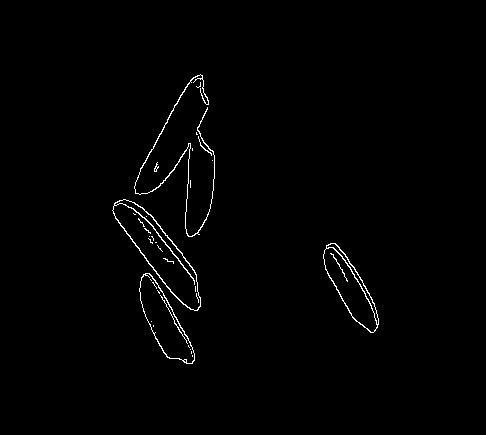

In [12]:
# use the canny from openCV
threshold1 = 5
threshold2 = 30
edges = cv2.Canny(gray2, threshold1, threshold2)
cv2_imshow(edges)


9. Apply a closing operation to the edges of the image. Experiment with different kernel sizes (3,5,9).


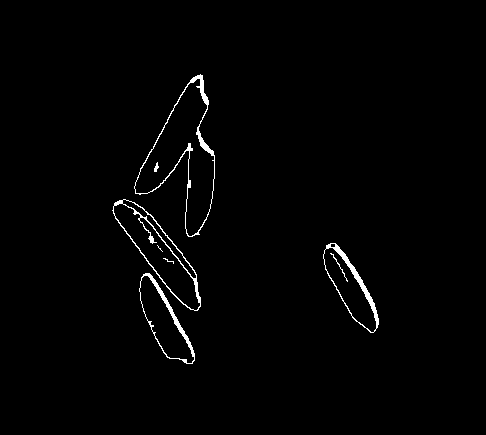

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

10. Find the countours (curve joining all the continuous points (along the boundary)) of the object, display the grains you found in the image. Explanation of contours is [here](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).
<br>a) what the values of the variable (array) cnts represents?  <br>b) What the variable "peri" represents?  <br>c) Change the color of the contour to red

A total of 4 grains were found
1


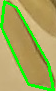

2


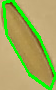

3


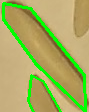

4


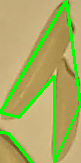

the grains


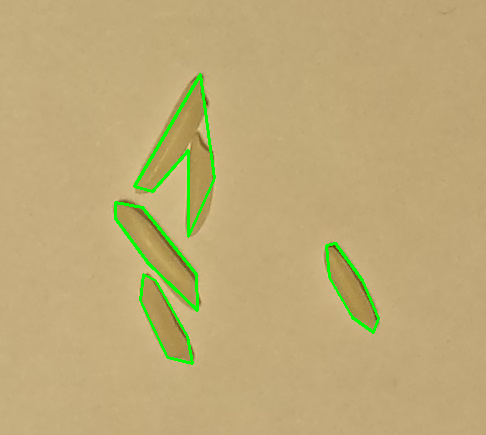

In [14]:
i=0
cnts,heir= cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]
# cnts is a list of contours found in the closed image
# variable "peri" represents the arcLength of a contour,
# and with c in the for loop, peri would be the perimeter of each contour in cnts array

print("A total of " + str(len(cnts)) + " grains were found")
for c in cnts:
	peri = cv2.arcLength(c, True)

  #an approximation of the contour of the figure
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# Understand what are the parameters of this function
	cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)

  # crop the image
	x,y,w,h =cv2.boundingRect(c)
	i=i+1;
	print(i)
	newImage=img[y:y+h,x:x+w]
	cv2_imshow(newImage)

print("the grains")
cv2_imshow(img)
